# Clustering and Classification Basics with Python

# Emre Mert Dübüş 

# 21727192 


# PART 1 
# Clustering with K-means

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.datasets import make_classification

In [2]:
# We took the data .

# ham_data is ham data :)

ham_data = pd.read_csv("diabetes_data.csv", sep=";")


In [3]:
# we are monitoring data with head(3) . 


print(ham_data.head(3))


   age gender  polyuria  polydipsia  sudden_weight_loss  weakness  polyphagia  \
0   40   Male         0           1                   0         1           0   
1   58   Male         0           0                   0         1           0   
2   41   Male         1           0                   0         1           1   

   genital_thrush  visual_blurring  itching  irritability  delayed_healing  \
0               0                0        1             0                1   
1               0                1        0             0                0   
2               0                0        1             0                1   

   partial_paresis  muscle_stiffness  alopecia  obesity  class  
0                0                 1         1        1      1  
1                1                 0         1        0      1  
2                0                 1         1        0      1  


In [4]:
# we take info of our data. 

# we have not null data and our data is ready now

print(ham_data.info())
print(ham_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    int64 
 3   polydipsia          520 non-null    int64 
 4   sudden_weight_loss  520 non-null    int64 
 5   weakness            520 non-null    int64 
 6   polyphagia          520 non-null    int64 
 7   genital_thrush      520 non-null    int64 
 8   visual_blurring     520 non-null    int64 
 9   itching             520 non-null    int64 
 10  irritability        520 non-null    int64 
 11  delayed_healing     520 non-null    int64 
 12  partial_paresis     520 non-null    int64 
 13  muscle_stiffness    520 non-null    int64 
 14  alopecia            520 non-null    int64 
 15  obesity             520 non-null    int64 
 16  class               520 no

In [5]:
#  LABEL ENCODING did here.

#   We convert gender column for all datasets 
#   Male : 0   Female : 1


original_dataset = ham_data

original_dataset['gender'] = original_dataset['gender'].map({'Male': 0,'Female': 1})



In [6]:
# For the clustering , we will seperate label column .
# Because you know that K-mean clustering is unlabeled learning method . 

odForCls = ham_data.iloc[:,:-1]     # Original dataset for clustering - no CLASS column
print(odForCls.head(3))

classes = ham_data.iloc[:,-1]   # Our labels is here   - there is CLASS

print("-----------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------")
print("-----------------------------------------------------------------------------------")

# We prepared normalized dataset as ndForCls
# Using MinMaxScaler , ages normalized as (0,1) in age column.

#  Normalized Here 

scaler = MinMaxScaler()

ndForCls = odForCls
ndForCls['age'] = scaler.fit_transform(ndForCls['age'].values.reshape(-1,1))

ndForCls_notclass = ndForCls

print(ndForCls.head(3))

print("****************************************************************************")
ndForCls["class"] = classes.values.reshape(-1,1)
normalized_dataset = ndForCls


   age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0   40       0         0           1                   0         1   
1   58       0         0           0                   0         1   
2   41       0         1           0                   0         1   

   polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0           0               0                0        1             0   
1           0               0                1        0             0   
2           1               0                0        1             0   

   delayed_healing  partial_paresis  muscle_stiffness  alopecia  obesity  
0                1                0                 1         1        1  
1                0                1                 0         1        0  
2                1                0                 1         1        0  
-----------------------------------------------------------------------------------
------------------------------------------

We tried to select the columns with the highest correlation by extracting the heatmap.

The reason why we chose the age column in the scatter plot is that the values in the other columns are bool.

<AxesSubplot:>

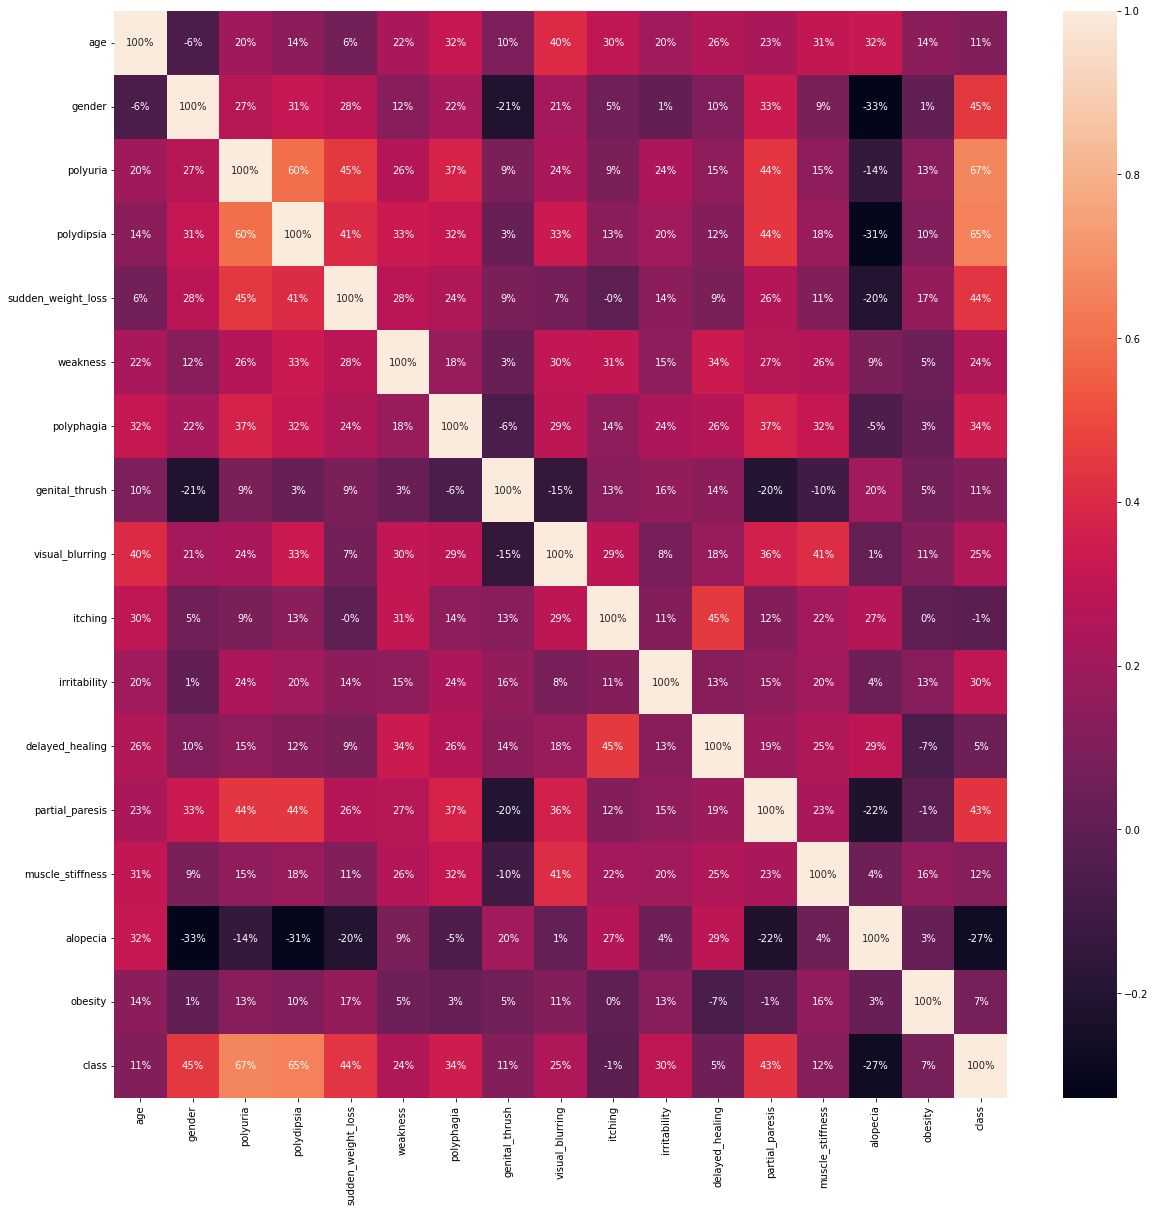

In [7]:
# HEAT MAP RELEASE

plt.figure(figsize=(20,20))
sns.heatmap(ham_data.iloc[:,:].corr(), annot=True, fmt='.0%')


In [8]:
X = odForCls.iloc[:,[2,3]].values
y = classes.values




In [9]:
KMeans_Clustering1 = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering1.fit(odForCls)

KMeans_Clustering2 = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering2.fit(odForCls)

KMeans(n_clusters=2, random_state=0)

In [10]:
print(KMeans_Clustering2.cluster_centers_)


[[0.40034999 0.17625899 0.17985612 0.08273381 0.14388489 0.38129496
  0.25179856 0.20863309 0.29136691 0.4352518  0.13669065 0.36690647
  0.18705036 0.27697842 0.5        0.14028777 0.29136691]
 [0.47012508 0.59090909 0.85950413 0.8677686  0.73140496 0.82231405
  0.69008264 0.23966942 0.62809917 0.54545455 0.36363636 0.5661157
  0.7107438  0.48760331 0.16528926 0.20247934 0.98760331]]


In [11]:
#prediction using kmeans and accuracy

kpred = KMeans_Clustering2.predict(odForCls)

print('Classification report:\n\n', classification_report(classes,kpred))

print(kpred)

Classification report:

               precision    recall  f1-score   support

           0       0.71      0.98      0.82       200
           1       0.99      0.75      0.85       320

    accuracy                           0.84       520
   macro avg       0.85      0.87      0.84       520
weighted avg       0.88      0.84      0.84       520

[0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1 1 1 0
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0
 0 0 1 1 0 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0

Confusion Matrix :


<AxesSubplot:>

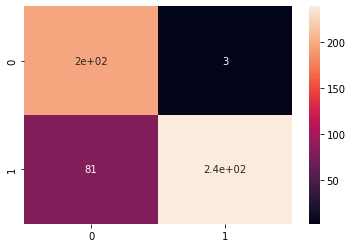

In [12]:
#confusion matrix

from sklearn.metrics import confusion_matrix
print("Confusion Matrix :")
outcome_labels = sorted(classes.unique())
sns.heatmap(
    confusion_matrix(classes, kpred),
    annot=True,
    xticklabels=outcome_labels,
    yticklabels=outcome_labels
)

In [13]:
KMeans_Clustering = KMeans(n_clusters =2, random_state=0)
KMeans_Clustering.fit(X)

KMeans(n_clusters=2, random_state=0)

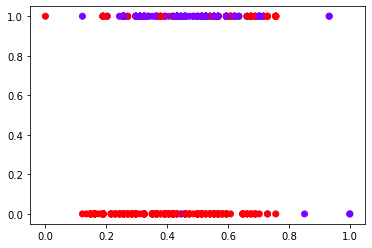

In [14]:
plt.scatter(odForCls.iloc[:, [0]],odForCls.iloc[:, [2]],
            c=KMeans_Clustering.labels_, cmap='rainbow')


# PART 2 
# OD , ND , COD , CND classification with Random Forest and SVM


In [15]:
print(original_dataset)

     age  gender  polyuria  polydipsia  sudden_weight_loss  weakness  \
0     40       0         0           1                   0         1   
1     58       0         0           0                   0         1   
2     41       0         1           0                   0         1   
3     45       0         0           0                   1         1   
4     60       0         1           1                   1         1   
..   ...     ...       ...         ...                 ...       ...   
515   39       1         1           1                   1         0   
516   48       1         1           1                   1         1   
517   58       1         1           1                   1         1   
518   32       1         0           0                   0         1   
519   42       0         0           0                   0         0   

     polyphagia  genital_thrush  visual_blurring  itching  irritability  \
0             0               0                0        1   

In [16]:
X1 = original_dataset.iloc[:,:-1]
y1 = original_dataset.iloc[:,-1]
X_train, X_test, Y_train, Y_test = train_test_split(X1, y1, test_size = 0.20, random_state = 42)



In [17]:
def svm_k_fold(x1,y1,n,dataset):
       
    classifier = SVC(kernel='linear', random_state = 0)

    kf = KFold(n_splits= n)
    
    accu_list = []
    avg_cm_0 = []
    avg_cm_1 = []
    
    for train_index, test_index in kf.split(dataset):
        
        x1_train, x1_test, y1_train, y1_test = x1.iloc[train_index], x1.iloc[test_index], y1.iloc[train_index], y1.iloc[test_index]

        classifier.fit(x1_train, y1_train)
        y_pred = classifier.predict(x1_test)
        
        cm = confusion_matrix(y1_test , y_pred)
        
        avg_cm_0.append(cm[0])
        avg_cm_1.append(cm[1])
        
        accu_list.append(accuracy_score(y1_test, y_pred))
        
    
    print("Average Accuracy Result for the {0} Fold : ".format(n) , sum(accu_list) / n )
    
    avg_conf_matrix = []
    avg_conf_matrix.append(sum(avg_cm_0))
    avg_conf_matrix.append(sum(avg_cm_1))
    print(avg_conf_matrix)
    
    sns.heatmap(avg_conf_matrix, annot=True, fmt=".0f")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Accuracy Score: {0}'.format(sum(accu_list) / n), size = 15)
    plt.show()
    result = sum(accu_list) / n
    return result






Average Accuracy Result for the 2 Fold :  0.8711538461538462
[array([162,  38], dtype=int64), array([ 29, 291], dtype=int64)]


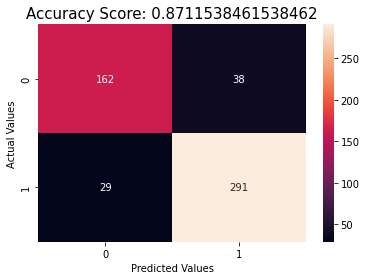

Average Accuracy Result for the 4 Fold :  0.9096153846153847
[array([179,  21], dtype=int64), array([ 26, 294], dtype=int64)]


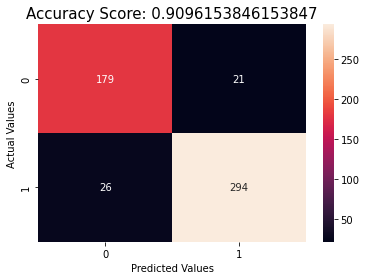

Average Accuracy Result for the 6 Fold :  0.915508331105765
[array([180,  20], dtype=int64), array([ 24, 296], dtype=int64)]


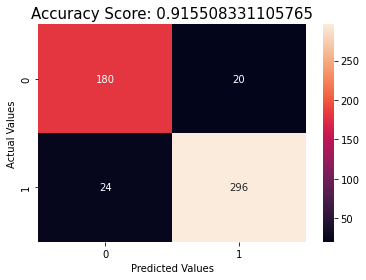

Average Accuracy Result for the 8 Fold :  0.9173076923076924
[array([180,  20], dtype=int64), array([ 23, 297], dtype=int64)]


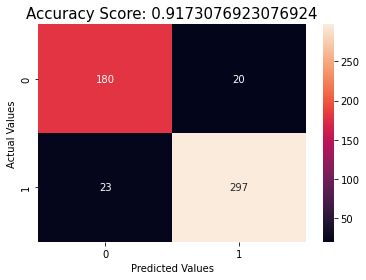

Average Accuracy Result for the 10 Fold :  0.9134615384615383
[array([180,  20], dtype=int64), array([ 25, 295], dtype=int64)]


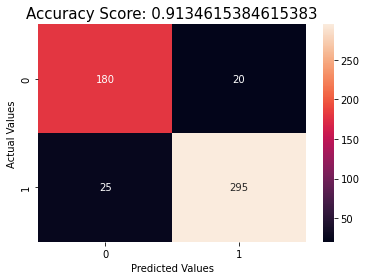

In [18]:
def run_svm():
#   for svm
    each_accu = []
    for i in range(2,11,2):
        each_accu.append(svm_k_fold(X1,y1,i,original_dataset))
    return each_accu
svm = run_svm()

[0.8711538461538462, 0.9096153846153847, 0.915508331105765, 0.9173076923076924, 0.9134615384615383]


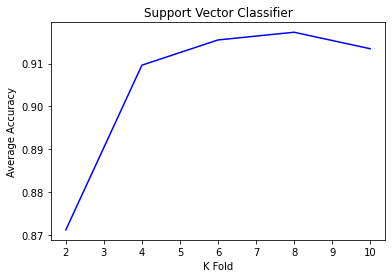

In [19]:
print(svm)
plt.plot(range(2,11,2), svm, color = 'blue')
plt.title('Support Vector Classifier')
plt.xlabel('K Fold')
plt.ylabel('Average Accuracy')
plt.show()

In [ ]:


As seen here, the highest accuracy is when k = 8 .



In [20]:
# RANDOM FOREST 
def rf_k_fold(x1,y1,n,dataset):
    

    rf = RandomForestClassifier(random_state=42)
    
    kf = KFold(n_splits= n)
    
    accu_list = []
    
    avg_cm_0 = []
    avg_cm_1 = []

    for train_index, test_index in kf.split(dataset):
        
        x1_train, x1_test, y1_train, y1_test = x1.iloc[train_index], x1.iloc[test_index], y1.iloc[train_index], y1.iloc[test_index]

        rf.fit(x1_train, y1_train)
        y_pred_rf = rf.predict(x1_test)
        
        accu_list.append(accuracy_score(y1_test, y_pred_rf))
     
    
        score = accuracy_score(y1_test, y_pred_rf)
        cm1 = confusion_matrix(y1_test, y_pred_rf)
        
        avg_cm_0.append(cm1[0])
        avg_cm_1.append(cm1[1])
        
        #****        
        
    print("Average Accuracy Result for the {0} Fold : ".format(n) , sum(accu_list) / n )
    
    avg_conf_matrix = []
    avg_conf_matrix.append(sum(avg_cm_0))
    avg_conf_matrix.append(sum(avg_cm_1))
    print(avg_conf_matrix)
    
    sns.heatmap(avg_conf_matrix, annot=True, fmt=".0f")
    plt.xlabel('Predicted Values')
    plt.ylabel('Actual Values')
    plt.title('Accuracy Score: {0}'.format(sum(accu_list) / n), size = 15)
    plt.show()
    result = sum(accu_list) / n
    return result

    




Average Accuracy Result for the 2 Fold :  0.9192307692307693
[array([173,  27], dtype=int64), array([ 15, 305], dtype=int64)]


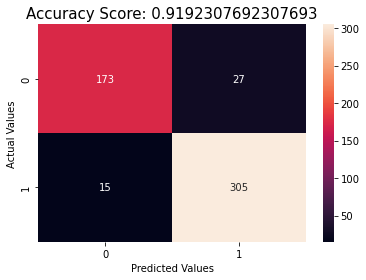

Average Accuracy Result for the 4 Fold :  0.9692307692307692
[array([192,   8], dtype=int64), array([  8, 312], dtype=int64)]


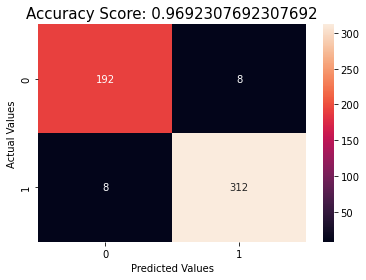

Average Accuracy Result for the 6 Fold :  0.975095785440613
[array([194,   6], dtype=int64), array([  7, 313], dtype=int64)]


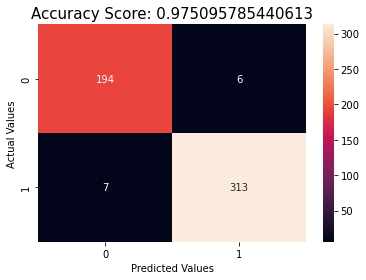

Average Accuracy Result for the 8 Fold :  0.9769230769230769
[array([194,   6], dtype=int64), array([  6, 314], dtype=int64)]


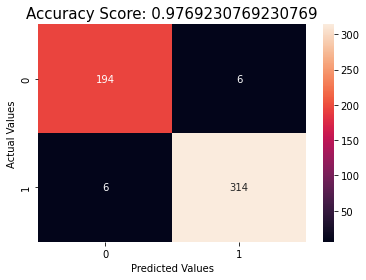

Average Accuracy Result for the 10 Fold :  0.9692307692307691
[array([191,   9], dtype=int64), array([  7, 313], dtype=int64)]


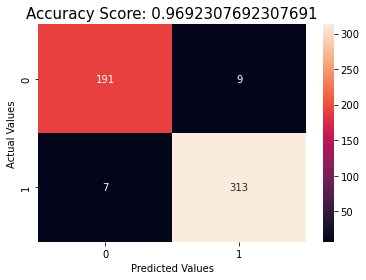

In [21]:
def run_rf():
    
#   for random forest
    each_accu1 = []
    for i in range(2,11,2):
        each_accu1.append(rf_k_fold(X1,y1,i,original_dataset))
        
    return each_accu1

rand_f = run_rf()



[0.9192307692307693, 0.9692307692307692, 0.975095785440613, 0.9769230769230769, 0.9692307692307691]


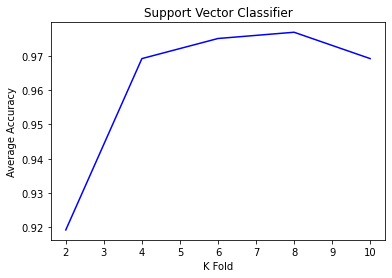

In [22]:
print(rand_f)
plt.plot(range(2,11,2), rand_f, color = 'blue')
plt.title('Support Vector Classifier')
plt.xlabel('K Fold')
plt.ylabel('Average Accuracy')
plt.show()

In [ ]:


As seen here, the highest accuracy is when k = 8 . Also RF gave us higher accuracy than SVM in almost every k mean .



In [23]:
    """   
    
    IF YOU WANT TO SEE EACH PORTION , YOU CAN REPLACE IT (#***)
        
        sns.heatmap(cm1, annot=True, fmt=".0f")
        plt.xlabel('Predicted Values')
        plt.ylabel('Actual Values')
        plt.title('Accuracy Score: {0}'.format(score), size = 15)
        plt.show()
        

    """

'   \n\nIF YOU WANT TO SEE EACH PORTION , YOU CAN REPLACE IT (#***)\n    \n    sns.heatmap(cm1, annot=True, fmt=".0f")\n    plt.xlabel(\'Predicted Values\')\n    plt.ylabel(\'Actual Values\')\n    plt.title(\'Accuracy Score: {0}\'.format(score), size = 15)\n    plt.show()\n    \n\n'

In [24]:
X2 = normalized_dataset.iloc[:,:-1]
y2 = normalized_dataset.iloc[:,-1]


Average Accuracy Result for the 2 Fold :  0.8692307692307693
[array([162,  38], dtype=int64), array([ 30, 290], dtype=int64)]


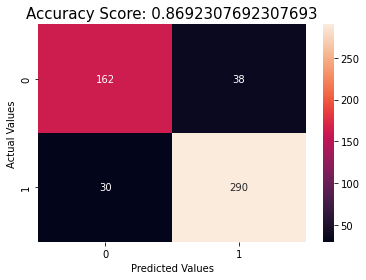

Average Accuracy Result for the 4 Fold :  0.9134615384615385
[array([179,  21], dtype=int64), array([ 24, 296], dtype=int64)]


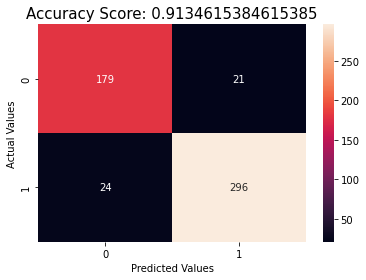

Average Accuracy Result for the 6 Fold :  0.9193174730464225
[array([181,  19], dtype=int64), array([ 23, 297], dtype=int64)]


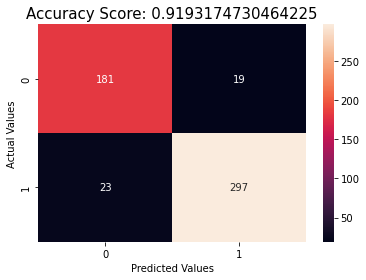

Average Accuracy Result for the 8 Fold :  0.9192307692307693
[array([180,  20], dtype=int64), array([ 22, 298], dtype=int64)]


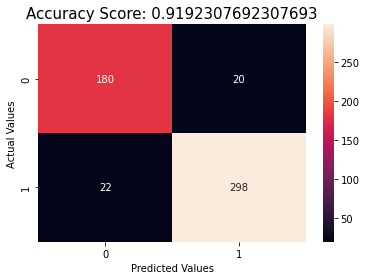

Average Accuracy Result for the 10 Fold :  0.9134615384615383
[array([179,  21], dtype=int64), array([ 24, 296], dtype=int64)]


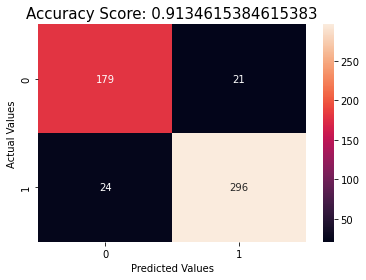

In [25]:
def run_svm_norm():
#   for svm with normalized data
    each_accu = []
    for i in range(2,11,2):
        each_accu.append(svm_k_fold(X2,y2,i,normalized_dataset))
    return each_accu

svm_norm = run_svm_norm()

[0.8692307692307693, 0.9134615384615385, 0.9193174730464225, 0.9192307692307693, 0.9134615384615383]


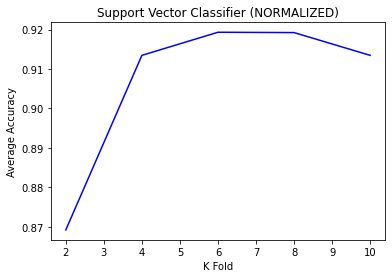

In [26]:
print(svm_norm)
plt.plot(range(2,11,2), svm_norm , color = 'blue')
plt.title('Support Vector Classifier (NORMALIZED)')
plt.xlabel('K Fold')
plt.ylabel('Average Accuracy')
plt.show()

In [ ]:

As seen here, the highest accuracy is when k = 6  . SVM gives better results on normalized data than the original data.



Average Accuracy Result for the 2 Fold :  0.9192307692307693
[array([173,  27], dtype=int64), array([ 15, 305], dtype=int64)]


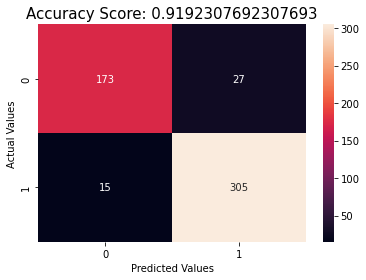

Average Accuracy Result for the 4 Fold :  0.9692307692307692
[array([192,   8], dtype=int64), array([  8, 312], dtype=int64)]


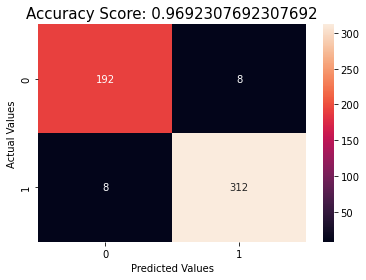

Average Accuracy Result for the 6 Fold :  0.9731800766283524
[array([193,   7], dtype=int64), array([  7, 313], dtype=int64)]


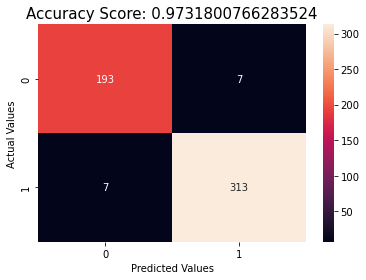

Average Accuracy Result for the 8 Fold :  0.975
[array([193,   7], dtype=int64), array([  6, 314], dtype=int64)]


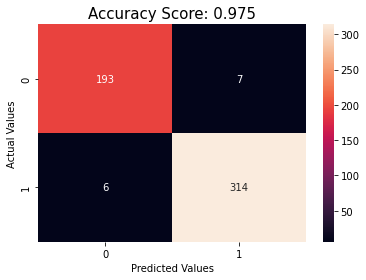

Average Accuracy Result for the 10 Fold :  0.9692307692307691
[array([191,   9], dtype=int64), array([  7, 313], dtype=int64)]


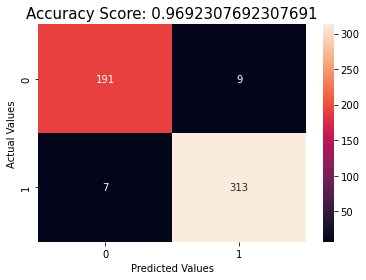

In [27]:
def run_rf_norm():
    
#   for random forest with normalized data
    each_accu1 = []
    for i in range(2,11,2):
        each_accu1.append(rf_k_fold(X2,y2,i,normalized_dataset))
    return each_accu1
    
rf_norm = run_rf_norm()

[0.9192307692307693, 0.9692307692307692, 0.9731800766283524, 0.975, 0.9692307692307691]


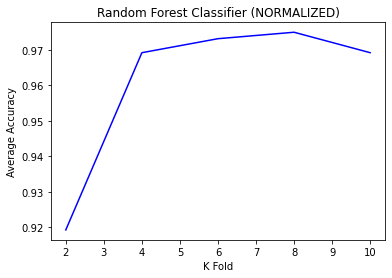

In [28]:
print(rf_norm)
plt.plot(range(2,11,2), rf_norm, color = 'blue')
plt.title('Random Forest Classifier (NORMALIZED)')
plt.xlabel('K Fold')
plt.ylabel('Average Accuracy')
plt.show()


As seen here, the highest accuracy is when k = 8 . 


Random Forest has given the best result so far with normalized data.


# Clustered Original Data Model with Random Forest

In [29]:
#  Clustered Original Data

# We had to convert the np arrays back into the pandas dataframe because we were doing operations with .iloc[] in the function.

lastAllori = pd.DataFrame(original_dataset, columns = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity','class'])
lastNdOri = pd.DataFrame(odForCls, columns = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'])
lastKpredOri = pd.DataFrame(classes, columns = ['class'])

X4 = lastNdOri
y4 = lastKpredOri

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)


Average Accuracy Result for the 2 Fold :  0.9192307692307693
[array([173,  27], dtype=int64), array([ 15, 305], dtype=int64)]


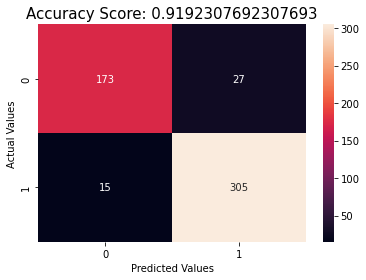

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_tra

Average Accuracy Result for the 4 Fold :  0.9692307692307692
[array([192,   8], dtype=int64), array([  8, 312], dtype=int64)]


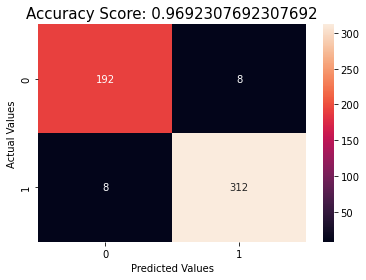

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_tra

Average Accuracy Result for the 6 Fold :  0.9731800766283524
[array([193,   7], dtype=int64), array([  7, 313], dtype=int64)]


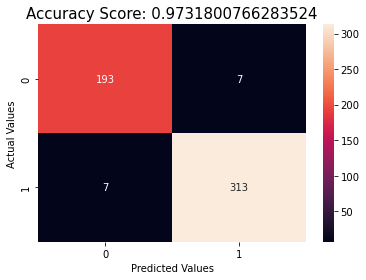

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_tra

Average Accuracy Result for the 8 Fold :  0.975
[array([193,   7], dtype=int64), array([  6, 314], dtype=int64)]


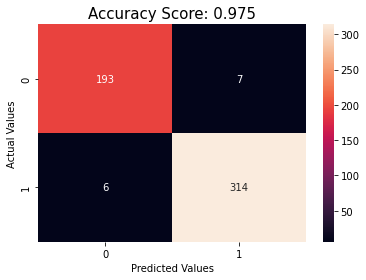

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_tra

Average Accuracy Result for the 10 Fold :  0.9692307692307691
[array([191,   9], dtype=int64), array([  7, 313], dtype=int64)]


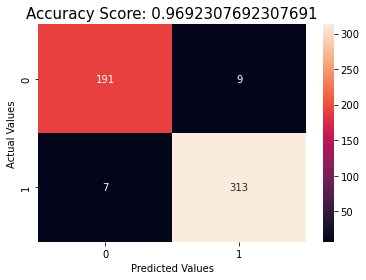

In [30]:
#  COD Implementing with Random Forest

def cod_rf():
    
#   for random forest with normalized data
    each_accu1 = []
    for i in range(2,11,2):
        each_accu1.append(rf_k_fold(X4,y4,i,lastAllori))
    return each_accu1
    
cod_rf_last = cod_rf()

[0.9192307692307693, 0.9692307692307692, 0.9731800766283524, 0.975, 0.9692307692307691]


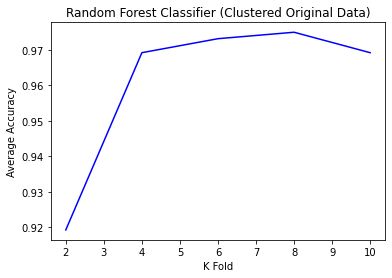

In [31]:
print(cod_rf_last)
plt.plot(range(2,11,2), cod_rf_last, color = 'blue')
plt.title('Random Forest Classifier (Clustered Original Data)')
plt.xlabel('K Fold')
plt.ylabel('Average Accuracy')
plt.show()

# Clustered Normalizated Data Model with Random Forest

In [32]:
#  Clustered Normalizated Data

# We had to convert the np arrays back into the pandas dataframe because we were doing operations with .iloc[] in the function.

lastAll = pd.DataFrame(ndForCls, columns = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity','class'])
lastNd = pd.DataFrame(ndForCls_notclass, columns = ['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity'])
lastKpred = pd.DataFrame(kpred , columns = ['class'])

X3 = lastNd
y3 = lastKpred

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)


Average Accuracy Result for the 2 Fold :  0.9653846153846154
[array([271,   7], dtype=int64), array([ 11, 231], dtype=int64)]


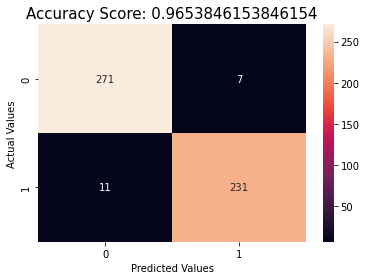

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_tra

Average Accuracy Result for the 4 Fold :  0.9865384615384616
[array([276,   2], dtype=int64), array([  5, 237], dtype=int64)]


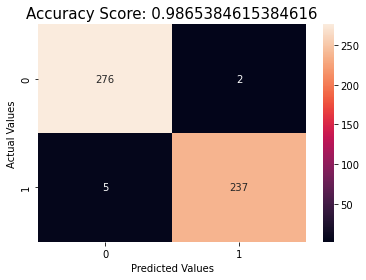

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_tra

Average Accuracy Result for the 6 Fold :  0.9923371647509578
[array([276,   2], dtype=int64), array([  2, 240], dtype=int64)]


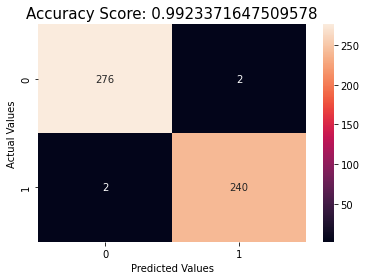

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_tra

Average Accuracy Result for the 8 Fold :  0.9923076923076923
[array([276,   2], dtype=int64), array([  2, 240], dtype=int64)]


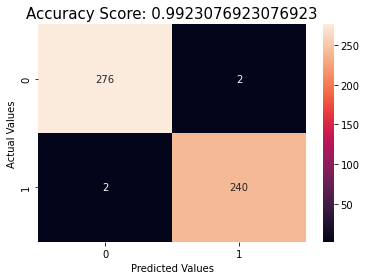

C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_train)
C:\Users\emert\AppData\Local\Temp/ipykernel_1004/2320243908.py:18: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x1_train, y1_tra

Average Accuracy Result for the 10 Fold :  0.9903846153846153
[array([275,   3], dtype=int64), array([  2, 240], dtype=int64)]


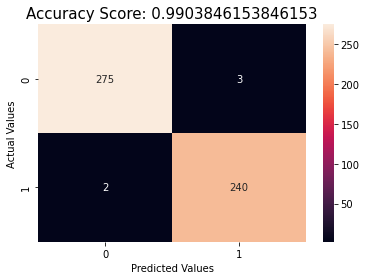

In [33]:
#  CND Implementing with Random Forest

def cnd_rf():
    
#   for random forest with normalized data
    each_accu1 = []
    for i in range(2,11,2):
        each_accu1.append(rf_k_fold(X3,y3,i,lastAll))
    return each_accu1
    
cnd_rf_last = cnd_rf()

[0.9653846153846154, 0.9865384615384616, 0.9923371647509578, 0.9923076923076923, 0.9903846153846153]


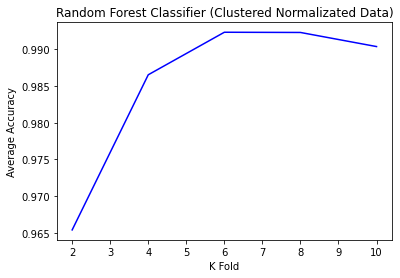

In [34]:
print(cnd_rf_last)
plt.plot(range(2,11,2), cnd_rf_last, color = 'blue')
plt.title('Random Forest Classifier (Clustered Normalizated Data)')
plt.xlabel('K Fold')
plt.ylabel('Average Accuracy')
plt.show()

# Result

As a result CND gave the best accuracy . The biggest reason for this was to use data classified with K-Means according to distance. When we retested this already classified data with the Random Forest model, which also gave the best results, we achieved 99 percent accuracy. (We also separated our data with K-fold while training with Random Forest.)

We frequently used sklearn libraries in this study. Sns and Matplotlib were used for visualization.